In [1]:
#importing necessary libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage.morphology import skeletonize
from skimage.util import invert

--2025-05-19 04:54:24--  https://drive.google.com/uc?export=download&id=1SaxN8kX-Dna5QQkjzuIQDzO4tK3SUtSL
Resolving drive.google.com (drive.google.com)... 142.251.16.101, 142.251.16.100, 142.251.16.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SaxN8kX-Dna5QQkjzuIQDzO4tK3SUtSL&export=download [following]
--2025-05-19 04:54:24--  https://drive.usercontent.google.com/download?id=1SaxN8kX-Dna5QQkjzuIQDzO4tK3SUtSL&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73286 (72K) [image/jpeg]
Saving to: ‘image_file’

image_file          100%[===================>]  71.57K  --.-KB/s    in 0.01s   

20

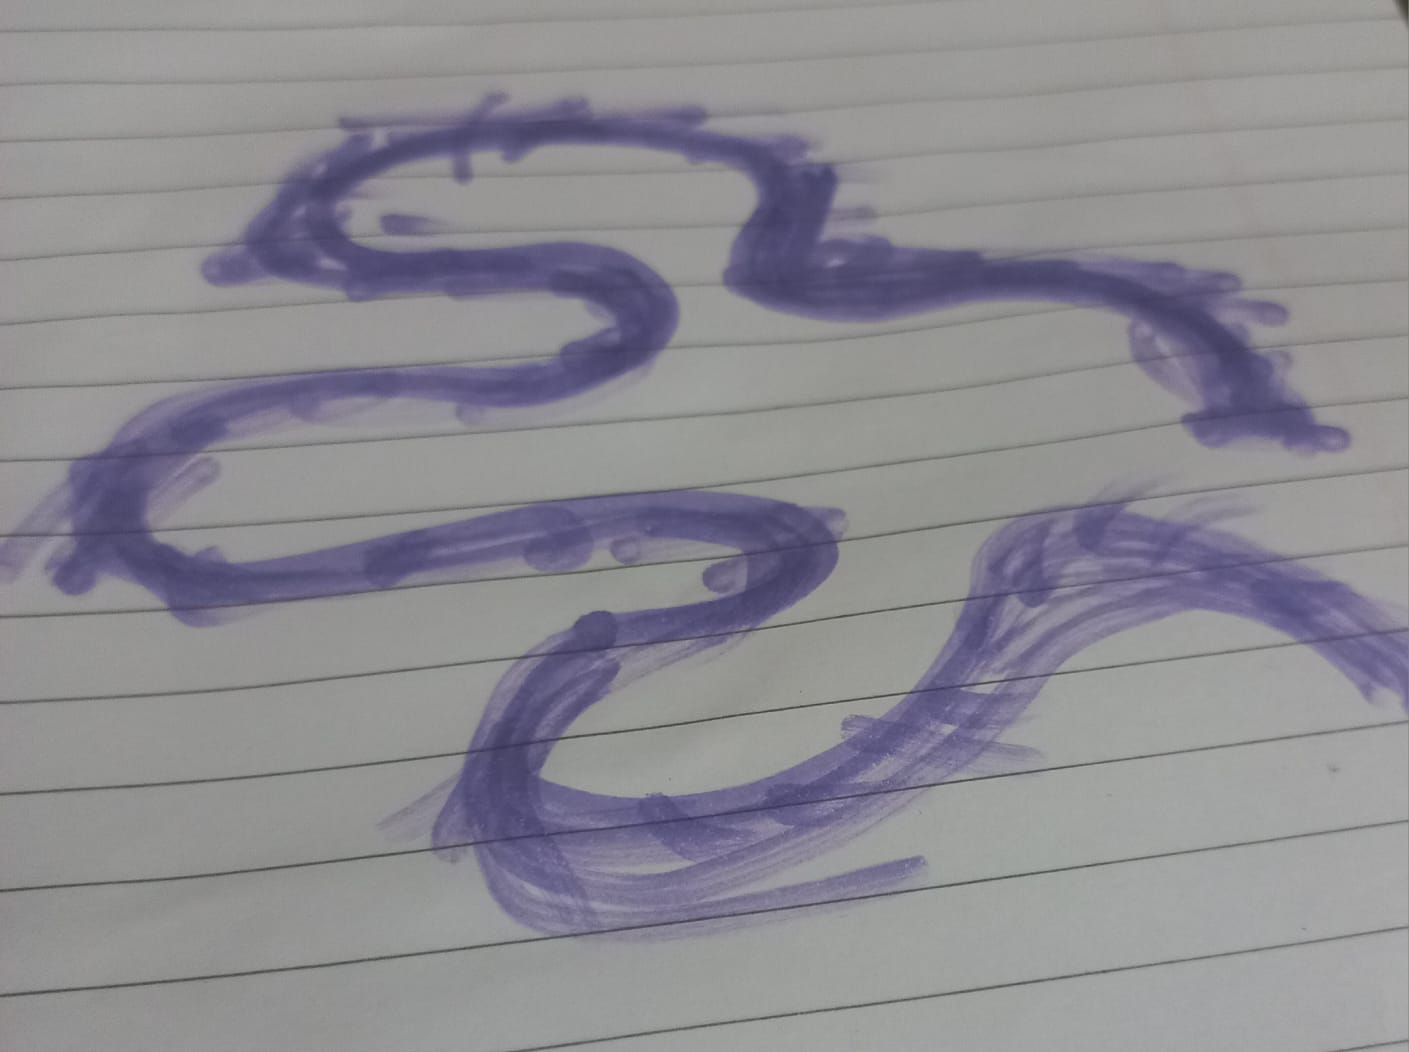

In [271]:
#loading image file

from IPython.display import clear_output

!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=1SaxN8kX-Dna5QQkjzuIQDzO4tK3SUtSL" -O image_file

raw_img =cv2.imread('/content/image_file')


print(raw_img.shape)
cv2_imshow(raw_img)

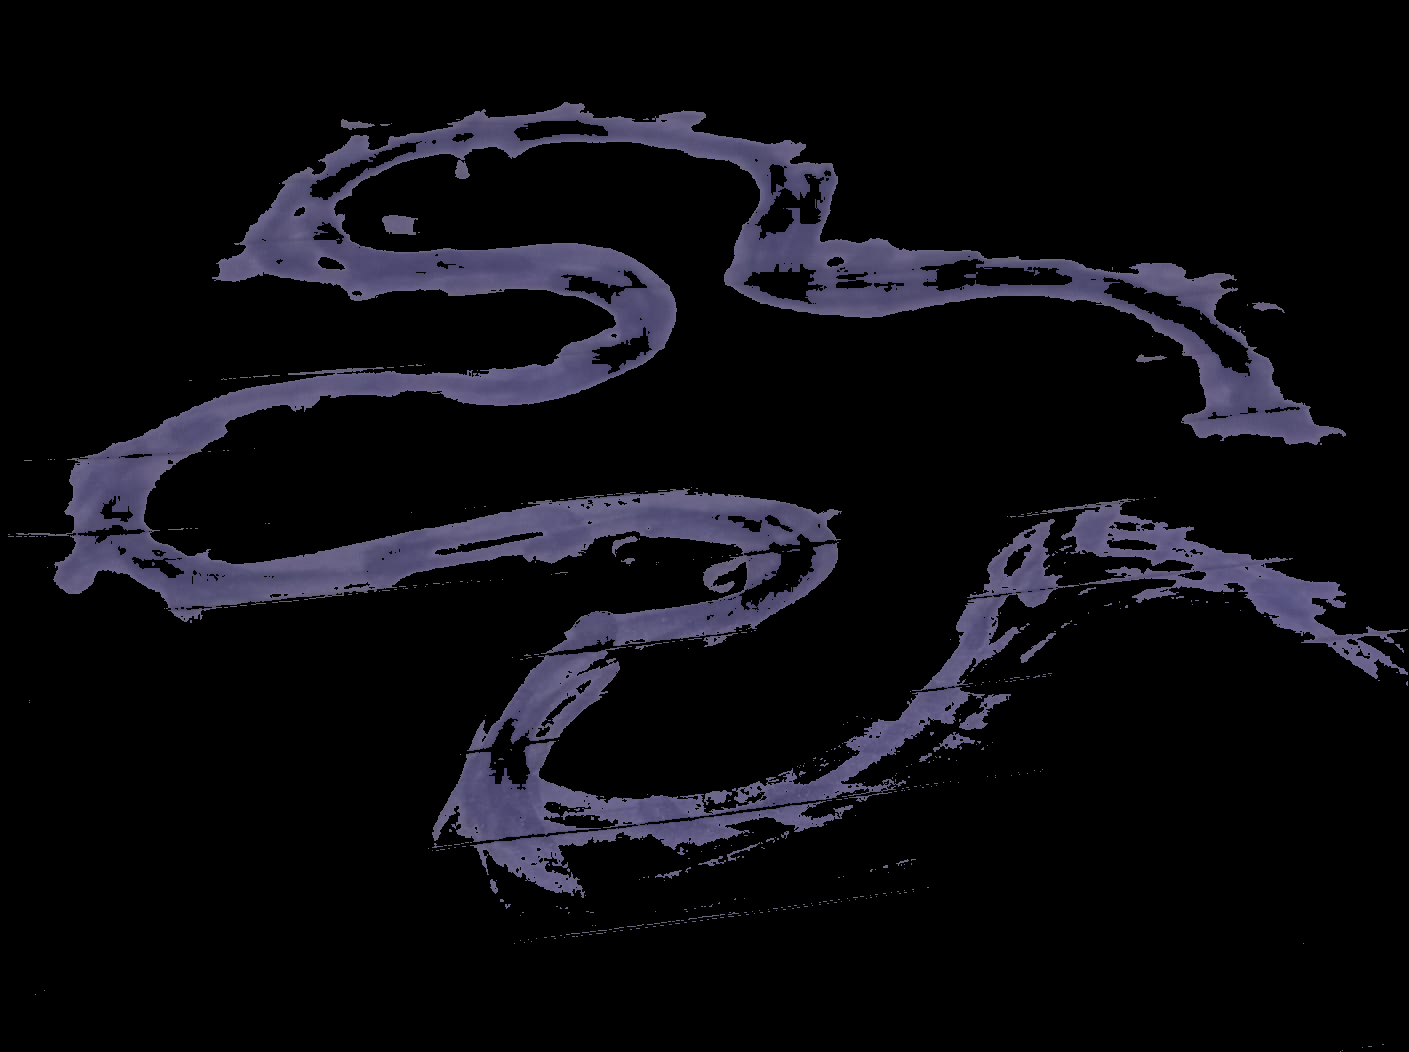

In [266]:
#creating mask to remove the background
hsv_image = cv2.cvtColor(raw_img, cv2.COLOR_BGR2HSV)
lower_bound = np.array([110,0,0])
upper_bound = np.array([190,110,110])

#creating mask
mask = cv2.inRange(raw_img, lower_bound, upper_bound)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

masked_image = cv2.bitwise_and(raw_img, raw_img, mask=mask)

cv2_imshow(masked_image)

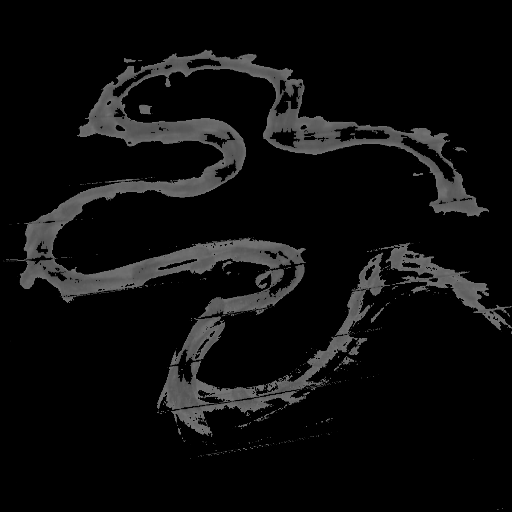

In [267]:
#changing to grayScale
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)
gray = cv2.resize(gray, (512, 512))
cv2_imshow(gray)

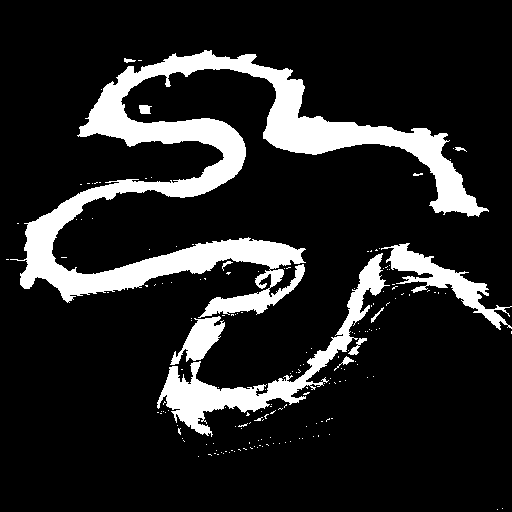

In [281]:
#Thresholding the image
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
thresh = cv2.bitwise_not(thresh)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#drawing contours
contour_img = np.zeros_like(thresh)
cv2.drawContours(contour_img, contours, -1, 255, cv2.FILLED)

cv2_imshow(contour_img)

#skeletonising the image
skeleton=skeletonize(contour_img)


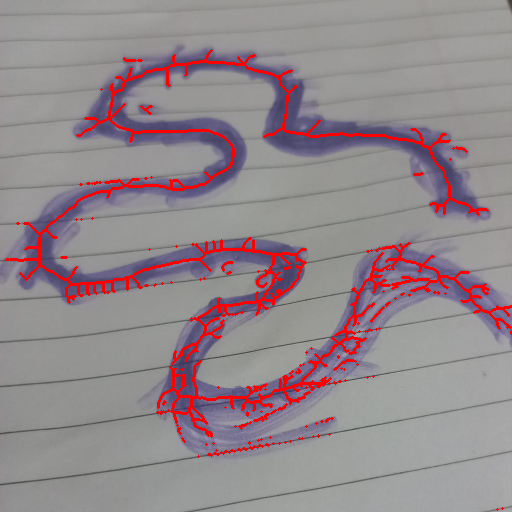

In [270]:
#code to overlay the skeleton with the orignal image
path_points = np.column_stack(np.where(skeleton == 1))
overlay = cv2.resize(raw_img, (512, 512))

for y, x in path_points:
    cv2.circle(overlay, (x, y), 1, (0, 0, 255), -1)  # Red points
cv2_imshow(overlay)

In [285]:
#code to download coordinates of path as csv file
import pandas as pd
from google.colab import files

# Convert (y, x) to (x, y)
df = pd.DataFrame(path_points[:, [1, 0]], columns=["x", "y"])
df.to_csv("robot_path.csv", index=False)

files.download("robot_path.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>